# 1. Introduction

My data is from cars.com and is a list of 25 data points representing the age, price, and miles of a used Honda Pilot. My [procedure was simply looking at the listings on the front page, and taking the top 25 cars.

In [1]:
Cars = read.csv("Honda Pilot Data.csv", header=TRUE)
attach(Cars)
head(Cars)

,age,miles,price
,<int>,<dbl>,<dbl>
1,10,124.2,17
2,8,84.1,22
3,9,109.6,21
4,5,59.4,28
5,7,84.9,19
6,7,91.4,22


# 2. Summary Statistics

In [2]:
x = age
y = price

In [3]:
x_mean = mean(x)
sx = sd(x)

y_mean = mean(y)
sy = sd(y)

SSX = sum((x-x_mean)^2)
SSY = sum((y-y_mean)^2)
SSXY = sum((x-x_mean)*(y-y_mean))

# To compute SSModel and SSE, we must first construct the linear model

m = SSXY/SSX
b = y_mean - m * x_mean

y_hat = m*x + b # predictions based on our model for each x
residuals = y - y_hat

SSModel = sum((y_hat - y_mean)^2)
SSE = sum(residuals^2)

summary_stats = data.frame(x_mean, sx, y_mean, sy, SSX, SSY, SSXY, SSModel, SSE)
colnames(summary_stats) = c("x_mean", "sx", "y_mean", "sy", "SSX", "SSY", "SSXY", "SSModel", "SSE")
summary_stats

x_mean,sx,y_mean,sy,SSX,SSY,SSXY,SSModel,SSE
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6.32,2.853653,26.296,8.460865,195.44,1718.07,-512.268,1342.706,375.3634


# 3. Regression

In [4]:
# R Regression
model = lm(y ~ x)
summary(model)

# Calcuated regression (as above)
m = SSXY/SSX
b = y_mean - m*x_mean
print(paste("y_hat = ", toString(m), "x + ", toString(b), sep=""))


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2348 -2.5714  0.1074  2.3230  7.1230 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   42.861      1.997   21.46  < 2e-16 ***
x             -2.621      0.289   -9.07 4.66e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.04 on 23 degrees of freedom
Multiple R-squared:  0.7815,	Adjusted R-squared:  0.772 
F-statistic: 82.27 on 1 and 23 DF,  p-value: 4.66e-09


[1] "y_hat = -2.62110110519853x + 42.8613589848547"


The calculated regression matches the regression done by R. The slope of the line (-2.62 thousand dollars/year) represents how much the price of the car is predicted to decrease for every one year increase in the age of the car. It makes sense for it to be negative because price should decrease as age increases.

# 4. Estimating Std. Dev. of Error

In [5]:
df = nrow(Cars) - 2
sigma = sqrt(SSE/df)
print(sigma)

[1] 4.03982


You can estimate the std.dev. of the error term by taking the square root of SSE divided by the degrees of freedom (n - 2)

# 5. Scatter Plot of Regression

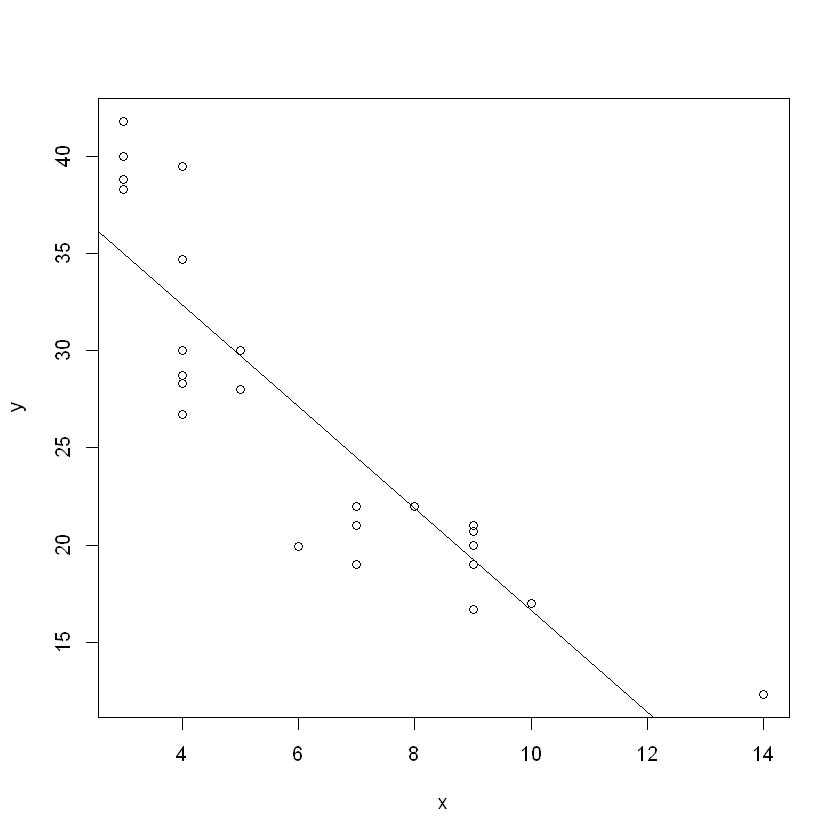

In [6]:
plot(x,y)
abline(model)

# 6. Residual Plots

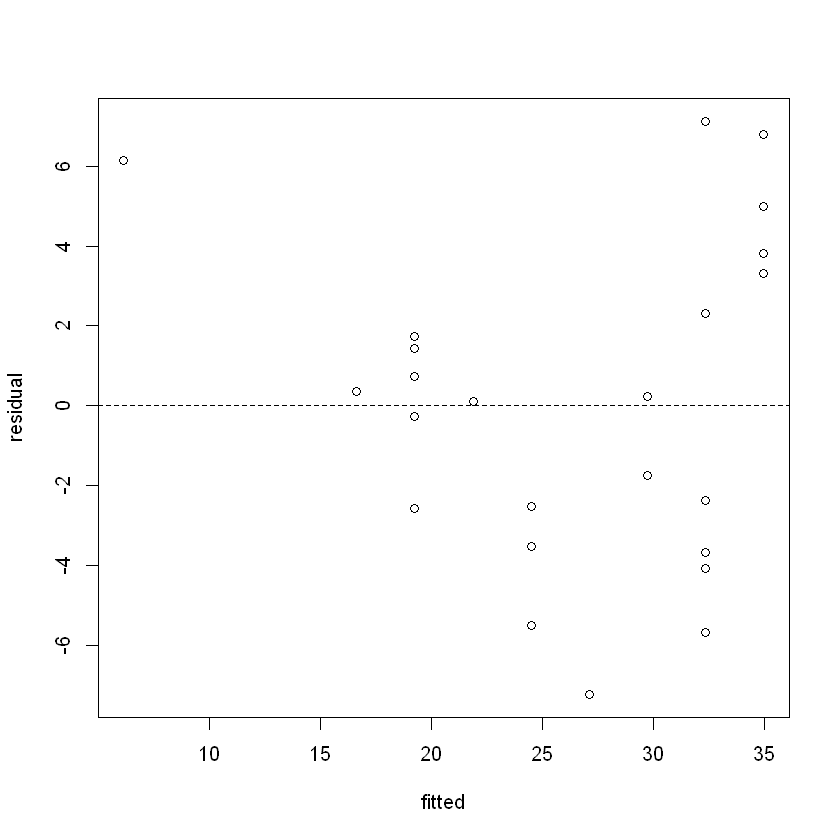

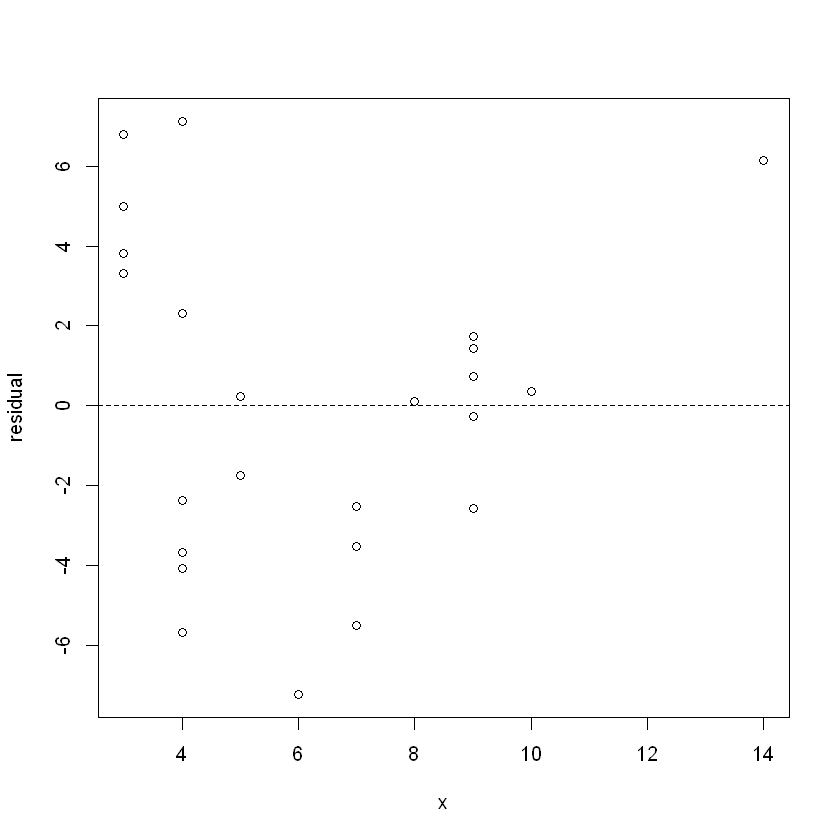

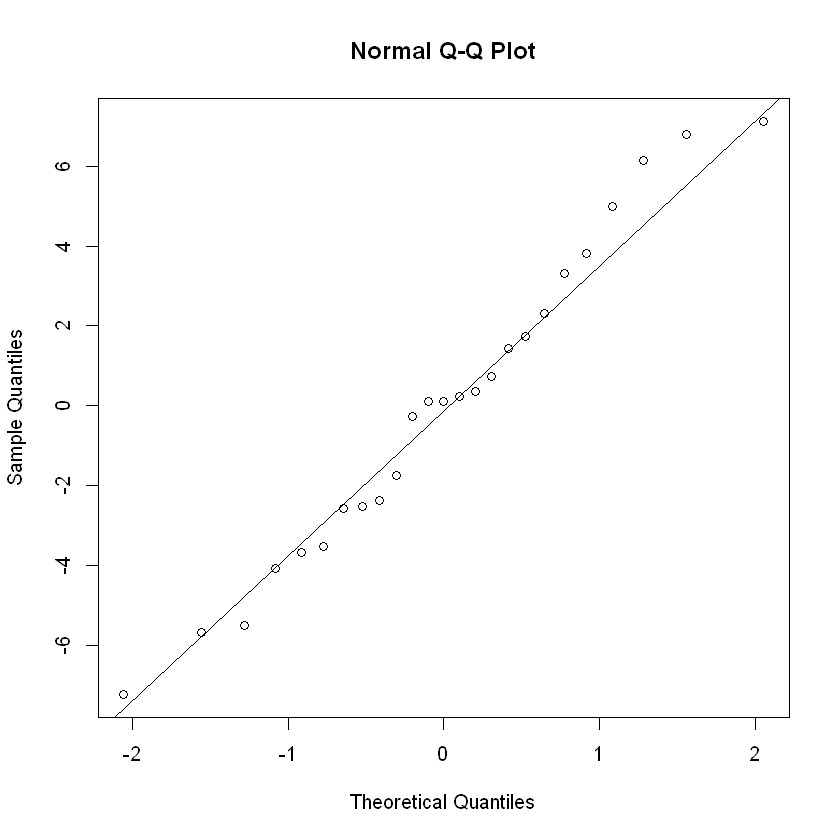

In [7]:
residual = residuals(model)
fitted = fitted(model)

plot(fitted, residual)
abline(h=0, lty=2)

plot(x, residual)
abline(h=0, lty=2)

qqnorm(residual)
qqline(residual)

From the scatter plot in part 5, we see that there is an approximate linear relationship and the residuals around the fitted values are dispersed around y=0, so the linearity condition is met. The residual vs age plot appears randomly scattered meaning that it is independent. The QQ plot however, shows a clear pattern meaning the rsiduals are not normally distributed. Additionally, homeoscedasticity also doesn't seem to apply as there is a cone shape in the resiudals meaning that the variance is not costant. 

# 7. Largest Residual

In [8]:
max_residual = which.max(abs(residual))
student_r = rstudent(model)
leverage = hatvalues(model)
cook = cooks.distance(model)

summary = data.frame(age[max_residual], price[max_residual], student_r[max_residual], leverage[max_residual], cook[max_residual])
names(summary) = c("age", "price", "studentized", "leverage", "cook")
summary

,age,price,studentized,leverage,cook
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
23,6,19.9,-1.934164,0.04052395,0.07058895


Car 23 had the highest residual, with an age of 6 years but a relatively low price of 19.9 thousand dollars. It's studentized residual is -1.93 which is between -2 and 2 so it's considered typical. The leverage is less than the cutoff of 2*2/25 so that's not unusual. Additionally the Cook's distance is also less than 4/n so that's not unusual either.

# 8. 90% Confidence Interval

In [9]:
summary(model)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2348 -2.5714  0.1074  2.3230  7.1230 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   42.861      1.997   21.46  < 2e-16 ***
x             -2.621      0.289   -9.07 4.66e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.04 on 23 degrees of freedom
Multiple R-squared:  0.7815,	Adjusted R-squared:  0.772 
F-statistic: 82.27 on 1 and 23 DF,  p-value: 4.66e-09


From the summary of the model we can construct a 90% confidence interval by calculating the following:

Estimated x ± (95% critical value) * SE

In [10]:
lower_bound = -2.621 - qt(0.95, df=nrow(Cars)-2) * 0.289
upper_bound = -2.621 + qt(0.95, df=nrow(Cars)-2) * 0.289

print(lower_bound)
print(upper_bound)

[1] -3.116309
[1] -2.125691


We are 90% confident that the true value of the slope is in the range (-3.12, -2.12).

# 9. Computing $R^2$

In [11]:
r = cor(x, y)
print(r^2)

ANOVA = anova(model)
ANOVA

r_squared = (ANOVA[1,2]/(ANOVA[1,2]+ANOVA[2,2]))
print(r_squared)

[1] 0.7815203


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,1342.7062,1342.70622,82.27292,4.659904e-09
Residuals,23,375.3634,16.32015,NA,NA


[1] 0.7815203


The value of $R^2$ is 0.78 which means around 78% of the variance in the prices can be explained by the age of the car.

# 10. Testing Strength of Relationship

In [12]:
cor.test(x,y)
print("Test for slope")
summary(model)$coefficients
print("ANOVA test")
ANOVA


	Pearson's product-moment correlation

data:  x and y
t = -9.0704, df = 23, p-value = 4.66e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9480158 -0.7513647
sample estimates:
       cor 
-0.8840364 


[1] "Test for slope"


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),42.861359,1.9970432,21.462409,1.032738e-16
x,-2.621101,0.2889717,-9.070442,4.659904e-09


[1] "ANOVA test"


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,1342.7062,1342.70622,82.27292,4.659904e-09
Residuals,23,375.3634,16.32015,NA,NA


The test for correlation results in a test statistic t of -9.07 and a p value of $4.66 \times 10^{-9}$. The test for slope results in the exact same test statistic and p value. The ANOVA test results in an F value of 82.27 and the same p value. Since the p value is low, we reject the null hypothesis, so there is not convincing evidence to reject the claim that there is a negative linear correlation between age and price.

# 11. Analyzing a Specific Age

In [13]:
a = 9
y_hat = m*a + b
print("Predicted Y for age 9")
y_hat
print("90% Confidence Interval for Mean at age 9")
cinterval = predict(model, newdata=data.frame(x=a), interval="confidence", level=0.90)
cinterval
print("90% Prediction Interval  at age 9")
pinterval = predict(model, newdata=data.frame(x=a), interval="prediction", level=0.90)
pinterval

[1] "Predicted Y for age 9"


[1] 19.27145

[1] "90% Confidence Interval for Mean at age 9"


,fit,lwr,upr
1,19.27145,17.35331,21.18958


[1] "90% Prediction Interval  at age 9"


,fit,lwr,upr
1,19.27145,12.08693,26.45597


The predicted price for a 9 year old car is 19.27 thousand dollars. We are 90% confident that the true mean price for a 9 year old car is between 17.35 and 21.19 thousand dollars. We are also 90% confident that a new data point of a 9 year old car will fall between 12.08 and 26.46 thousand dollars.

# 12. Free Car Phenomenon

In [14]:
free_age = -b/m
print(free_age)

[1] 16.35242


Our model says that a 16 year old car should be sold for 0 dollars, which honestly isn't that bad of a prediction. I mean, no one would really buy a 16 year old car anyways. However, it still does show the inaccuracies that lie behind any linear model - at some point, the predictions don't line up with reality (the car would still probably be sold for *some* money)

# 13. Conclusion

Overall, this dataset fits pretty well to a linear model. Although the data point didn't really satisfy the conditions to make conclusions based on the model, I think with enough data collection we would get the constant variance we are looking for. Additionally, data collection is a little biased as very old cars don't often get sold, so we have more data points that are newer. There weren't too many big outliers and the car with the biggest deviation from the prediction was found to still lie within the realm of reality - each of the 3 measurements said that it was typical. One more thing to note is that there were only 25 cars in the dataset, so actually some of the assumptions used in the tests we conducted (normality, etc.) wouldn't hold because we need at least 30 (the assignment page said at least 25 data points though!).